## Baseline model with both info from the source and target country as features

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from prepare_data import get_data

In [2]:
based_on = None
data = get_data(based_on=based_on)
data.merge_data()
df_merged = data.df_merged
print(df_merged.columns)
print(df_merged.shape)

Index(['Country_x', 'Year', 'Carbon Emissions_x', 'Education Expenditure_x',
       'Foreign Direct Investment (FDI) Inflows_x', 'GDP_x',
       'Health Expenditure_x', 'Inflation Rate_x', 'Internet Penetration_x',
       'Life Expectancy_x', 'Renewable Energy Production_x',
       'Unemployment Rate_x', 'Country_y', 'Carbon Emissions_y',
       'Education Expenditure_y', 'Foreign Direct Investment (FDI) Inflows_y',
       'GDP_y', 'Health Expenditure_y', 'Inflation Rate_y',
       'Internet Penetration_y', 'Life Expectancy_y',
       'Renewable Energy Production_y', 'Unemployment Rate_y', 'CO2', 'COU',
       'Value'],
      dtype='object')
(14742, 26)


In [3]:
mode = "reg"

data.create_X_y(q=3,mode=mode)
data.split(test_size=0.2)

X_train = data.X_train
y_train = data.y_train
X_test = data.X_test
y_test = data.y_test

# XGBoost

In [4]:
# Logarithmic transformation of the target variable

if mode=="reg":
    y_train_log = np.log1p(y_train)  # Apply log transformation to y_train

    # Define the XGBoost model
    model = xgb.XGBRegressor()
    
    # Fit the model on the training data
    model.fit(X_train, y_train_log)

    # Make predictions on the test data
    y_pred_log = model.predict(X_test)  # Predict on X_test

    # Inverse transformation of the predicted values
    y_pred = np.expm1(y_pred_log)  # Apply inverse log transformation
else:
    model = xgb.XGBClassifier()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred= model.predict(X_test)  # Predict on X_test

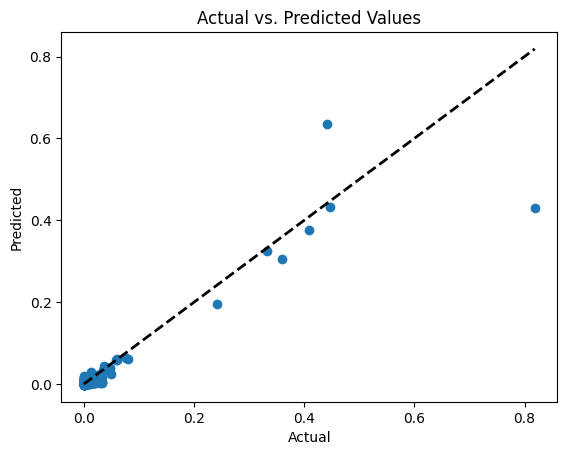

Mean Squared Error: 7.196754608425008e-05


In [5]:
if mode=="class":
    # Calculate evaluation metrics
    classification_metrics = classification_report(y_test, y_pred)
    print("Classification Report:\n", classification_metrics)
else:
    # Plot the actual vs. predicted values for the test data
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted Values')
    plt.show()

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

# Randomforest

In [6]:
if mode=="reg":
    # Define the Random Forest model
    model = RandomForestRegressor()
    
    # Logarithmic transformation of the target variable
    y_train_log = np.log1p(y_train)  # Apply log transformation to y_train  
    
    # Fit the model on the training data
    model.fit(X_train, y_train_log)

    # Make predictions on the test data
    y_pred_log = model.predict(X_test)  # Predict on X_test

    # Inverse transformation of the predicted values
    y_pred = np.expm1(y_pred_log)  # Apply inverse log transformation    
else:
    model = RandomForestClassifier()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)  # Predict on X_test

C:\Users\marti\AppData\Local\Temp\ipykernel_8088\839464980.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train_log)


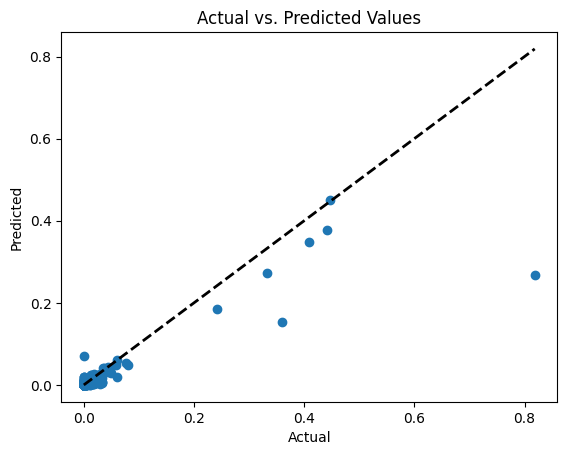

Mean Squared Error: 0.0001302835023237493


In [7]:
if mode=="class":
    # Calculate evaluation metrics
    classification_metrics = classification_report(y_test, y_pred)
    print("Classification Report:\n", classification_metrics)
else:
    # Plot the actual vs. predicted values for the test data
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted Values')
    plt.show()

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

### Test with different Q values for the percentile bins clustering

In [8]:
Qs = [2,3,5,10,20]
model = RandomForestClassifier()
# model = RandomForestRegressor()
mode= "class"

results = []

for q in Qs:
    data.create_X_y(q=q,mode=mode)
    data.split(test_size=0.2)

    X_train = data.X_train
    y_train = data.y_train
    X_test = data.X_test
    y_test = data.y_test
    
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    if mode=="class":
        # Calculate evaluation metrics
        res = classification_report(y_test, y_pred,output_dict=True)['accuracy']
    else:
        # Calculate the mean squared error
        res = mean_squared_error(y_test, y_pred)
    
    results.append(res)

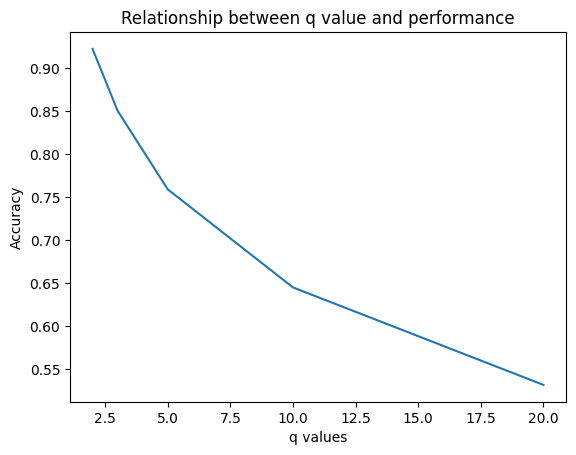

In [9]:
# Plot the relationship between q value and result metric
plt.plot(Qs, results)
plt.xlabel('q values')
plt.ylabel('Accuracy')
plt.title('Relationship between q value and performance')
plt.show()

### Explanability of the RandomForest

In [10]:
# model = RandomForestClassifier()
model = RandomForestRegressor()
mode= "reg"

q=5

data.create_X_y(q=q,mode=mode)
data.split(test_size=0.2)

X_train = data.X_train
y_train = data.y_train
X_test = data.X_test
y_test = data.y_test

if mode=="reg":
    # Define the Random Forest model
    model = RandomForestRegressor()
    
    # Logarithmic transformation of the target variable
    y_train_log = np.log1p(y_train)  # Apply log transformation to y_train  
    
    # Fit the model on the training data
    model.fit(X_train, y_train_log)

    # Make predictions on the test data
    y_pred_log = model.predict(X_test)  # Predict on X_test

    # Inverse transformation of the predicted values
    y_pred = np.expm1(y_pred_log)  # Apply inverse log transformation    
else:
    model = RandomForestClassifier()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)  # Predict on X_test

if mode=="class":
    # Calculate evaluation metrics
    res = classification_report(y_test, y_pred)
else:
    # Calculate the mean squared error
    res = mean_squared_error(y_test, y_pred)
print(res)

C:\Users\marti\AppData\Local\Temp\ipykernel_8088\3786861563.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train_log)


9.938190198086152e-05


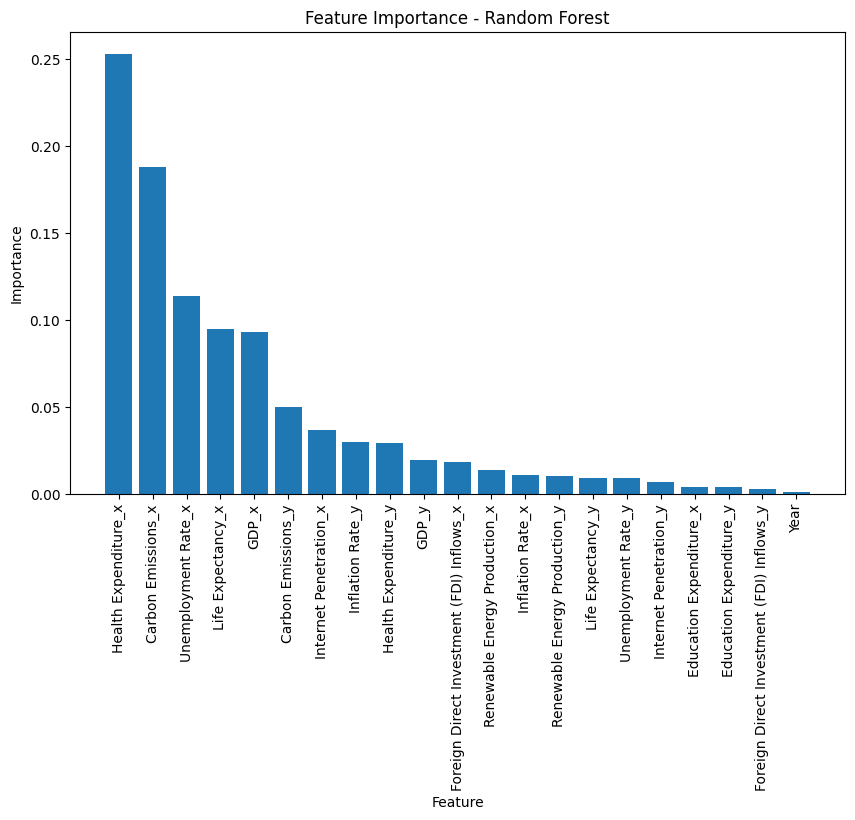

In [11]:
feature_names = data.feature_names

# Extract the feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()